In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 필요모듈 import
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pylab as plt

In [3]:
# train.csv 파일 읽어옴. dataframe 형태로 반환
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA 실습/SF_data/train.csv')

## visualization

In [4]:
# datatype 변경
train['Dates'] = train['Dates'].astype('datetime64')

In [5]:
# new column 생성
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.dayofweek
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,0,15
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,0,1
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,0,1
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,0,1


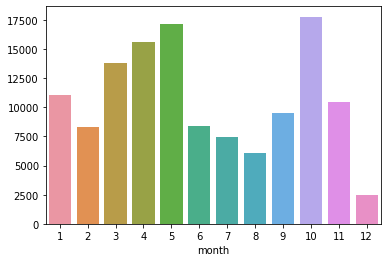

In [6]:
# 월별 범죄율 
sns.barplot( x = train.groupby('month').size().index, y = train.groupby('month').size().values -62500)

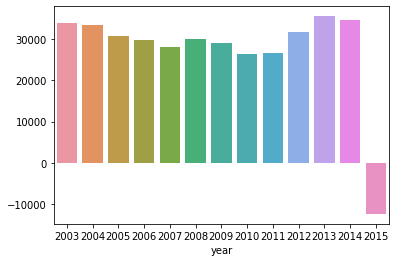

In [7]:
# 연도별 범죄 횟수
sns.barplot(x = train.groupby('year').size().index, y = train.groupby('year').size().values - 40000)

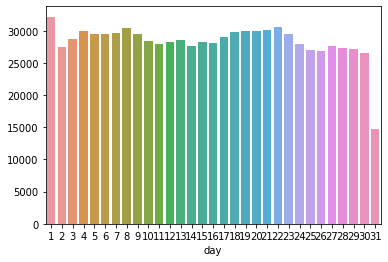

In [8]:
# 일별 범죄 횟수 
sns.barplot( x = train.groupby('day').size().index, y = train.groupby('day').size().values)

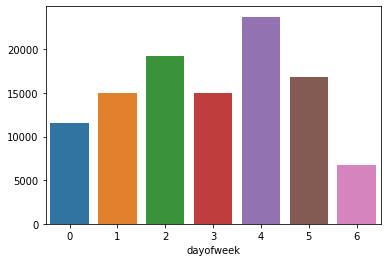

In [9]:
# 요일별 범죄 횟수 
sns.barplot( x = train.groupby('dayofweek').size().index, y = train.groupby('dayofweek').size().values - 110000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

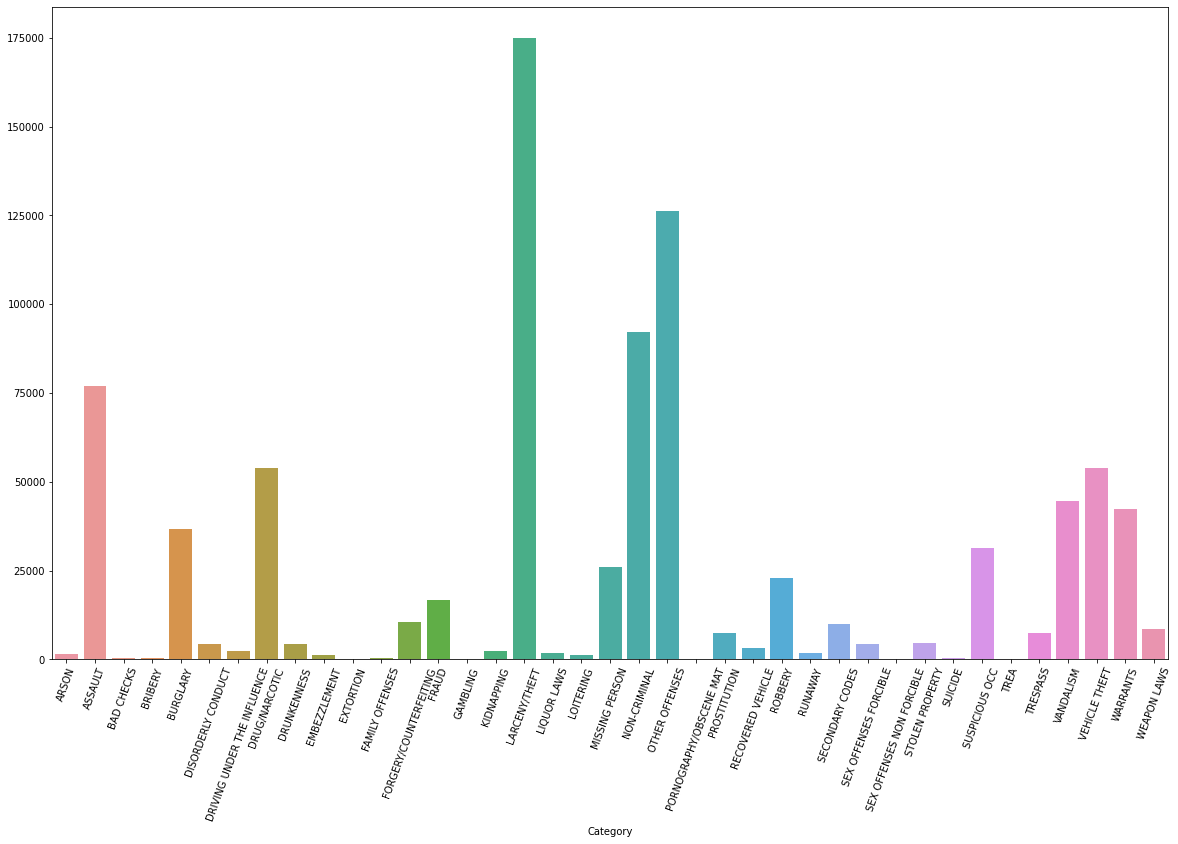

In [10]:
# 카테고리별 범죄 횟수 
plt.subplots(figsize = (20,12))
sns.barplot( x = train.groupby('Category').size().index, y = train.groupby('Category').size().values)
plt.xticks(rotation = 70)

## Modelling

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   year        878049 non-null  int64         
 10  month       878049 non-null  int64         
 11  day         878049 non-null  int64         
 12  dayofweek   878049 non-null  int64         
 13  hour        878049 non-null  int64         
 14  minute      878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(

In [35]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30


In [36]:
# 해당 컬럼 drop
train_data = train.drop(["Descript", "Resolution"], axis = 1)

In [17]:
def transformDataset(dataset):
    dataset['Dates'] = pd.to_datetime(dataset['Dates'])
    
    dataset['Date'] = dataset['Dates'].dt.date
    
    dataset['n_days'] = (dataset['Date'] - dataset['Date'].min()).apply(lambda x: x.days)
    
    dataset['Year'] = dataset['Dates'].dt.year
    dataset['DayOfWeek'] = dataset['Dates'].dt.dayofweek # OVERWRITE
    dataset['WeekOfYear'] = dataset['Dates'].dt.weekofyear
    dataset['Month'] = dataset['Dates'].dt.month
    
    dataset['Hour'] = dataset['Dates'].dt.hour
    
    dataset['Block'] = dataset['Address'].str.contains('block', case=False)
    dataset['Block'] = dataset['Block'].map(lambda x: 1 if  x == True else 0)

    
    dataset = dataset.drop('Dates', 1)
    dataset = dataset.drop('Date', 1)
    dataset = dataset.drop('Address', 1)
    
    dataset = pd.get_dummies(data=dataset, columns=[ 'PdDistrict'], drop_first = True)
    return dataset
    

In [18]:
train = transformDataset(train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [37]:
x = train_data.drop("Category",axis=1).values
y = train_data["Category"].values

In [27]:
from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

## RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,min_samples_split=100 )
rfc.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=100, n_estimators=40)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
rfc_pred = rfc.predict(X_test)
print (classification_report(y_test,rfc_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.09      0.09      0.09      7675
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        28
           4       0.05      0.01      0.01      3758
           5       0.00      0.00      0.00       398
           6       0.00      0.00      0.00       243
           7       0.06      0.07      0.07      5532
           8       0.00      0.00      0.00       452
           9       0.00      0.00      0.00       119
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00        63
          12       0.00      0.00      0.00      1058
          13       0.03      0.00      0.00      1664
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00       215
          16       0.20      0.49      0.29     17431
          17       0.00    

([<matplotlib.axis.YTick at 0x7f8bb0b715d0>,
 [Text(0, 0, 'DayOfWeek'),
  Text(0, 0, 'X'),
  Text(0, 0, 'Y'),
  Text(0, 0, 'year'),
  Text(0, 0, 'month'),
  Text(0, 0, 'day'),
  Text(0, 0, 'dayofweek'),
  Text(0, 0, 'hour'),
  Text(0, 0, 'minute'),
  Text(0, 0, 'n_days'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'WeekOfYear'),
  Text(0, 0, 'Month'),
  Text(0, 0, 'Hour'),
  Text(0, 0, 'Block'),
  Text(0, 0, 'PdDistrict_CENTRAL'),
  Text(0, 0, 'PdDistrict_INGLESIDE'),
  Text(0, 0, 'PdDistrict_MISSION'),
  Text(0, 0, 'PdDistrict_NORTHERN'),
  Text(0, 0, 'PdDistrict_PARK'),
  Text(0, 0, 'PdDistrict_RICHMOND'),
  Text(0, 0, 'PdDistrict_SOUTHERN'),
  Text(0, 0, 'PdDistrict_TARAVAL'),
  Text(0, 0, 'PdDistrict_TENDERLOIN')])

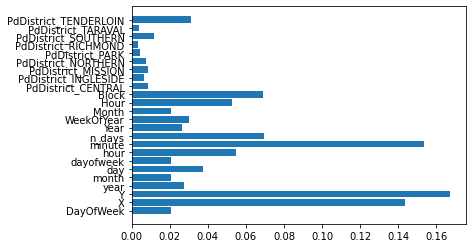

In [33]:
n_features = X.shape[1]
plt.barh(range(n_features),rfc.feature_importances_)
plt.yticks(np.arange(n_features),train_data.columns[1:])